In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing essential libraries for performing NLP tasks
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Importing essential libraries for modelling and evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

import sys
if not sys.warnoptions:
    import warnings
    warnings.filterwarnings("ignore")


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Loading the dataset
df = pd.read_csv('Spam_SMS_Collection.txt', sep='\t', names=['label', 'message'])

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [8]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


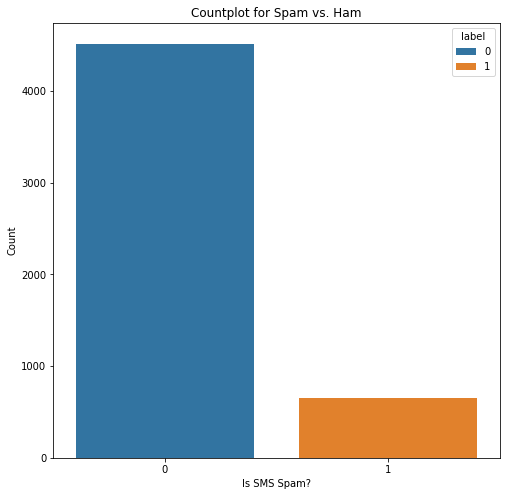

In [11]:
plt.figure(figsize=(8,8))
sns.countplot(x='label', data=df, hue='label')
plt.title('Countplot for Spam vs. Ham')
plt.xlabel('Is SMS Spam?')
plt.ylabel('Count')
plt.show()

###  *Insight:* From the above countplot, it is evident that the dataset is **imbalanced**.

## **Feature Engineering**
*   Handling imbalanced dataset using Oversampling
*   Creating new features e.g. word_count, contains_currency_symbol, contains_numbers, etc.


In [12]:
# Handling imbalanced dataset using Oversampling
spam = df[df['label']==1]
ham =  df[df['label']==0]
print('Number of Spam records: {}'.format(spam.shape[0]))
print('Number of Ham records: {}'.format(ham.shape[0]))

Number of Spam records: 653
Number of Ham records: 4516


In [13]:
count = int(ham.shape[0]-spam.shape[0])

for i in range(0, count):
    record = pd.DataFrame(spam.sample(n=1))
    df = pd.concat([df, record])


In [14]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
4036,1,YOU ARE CHOSEN TO RECEIVE A £350 AWARD! Pls ca...
1221,1,No. 1 Nokia Tone 4 ur mob every week! Just txt...
1328,1,Ur balance is now £500. Ur next question is: W...
840,1,Last chance 2 claim ur £150 worth of discount ...


In [15]:
df['label'].value_counts()

label
0    4516
1    4516
Name: count, dtype: int64

In [16]:
#Creating new feature 'word_count'
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [17]:
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


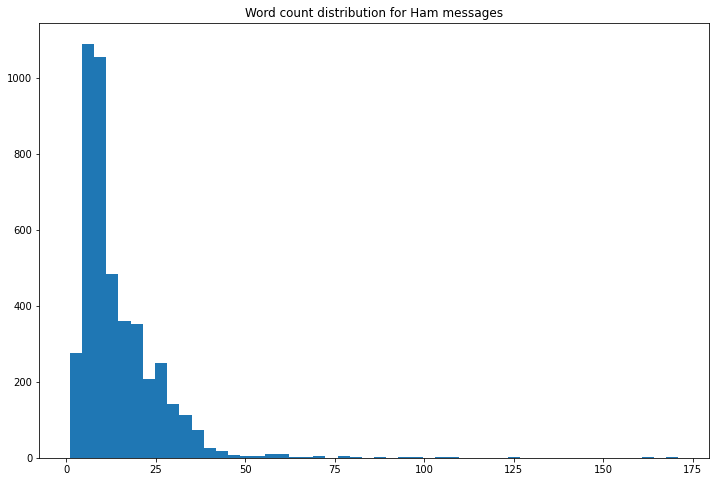

In [18]:
plt.figure(figsize=(12, 8))
df1 = df[df['label']==0]
plt.hist(df1['word_count'], bins=50, label='Ham')
plt.title('Word count distribution for Ham messages')
plt.show()

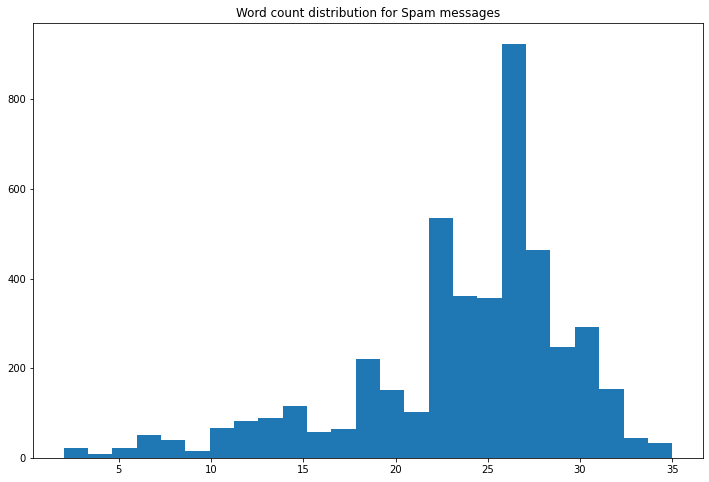

In [19]:
plt.figure(figsize=(12, 8))
df2 = df[df['label']==1]
plt.hist(df2['word_count'], bins=25, label='Spam')
plt.title('Word count distribution for Spam messages')
plt.show()


_**Insight:** **Spam messages** word_count fall in the range of **15-30 words**, whereas majority of the **Ham messages** fall in the range of **below 25 words**._

In [20]:
# Creating feature 'contains_currency_symbol'
def currency(x):
    currency_symbols = ['€', '$', '¥', '£', '₹']
    for i in currency_symbols:
        if i in x:
            return 1
    return 0

df['contains_currency_symbol'] = df['message'].apply(currency)


In [21]:
df

,label,message,word_count,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
4036,1,YOU ARE CHOSEN TO RECEIVE A £350 AWARD! Pls ca...,28,1
1221,1,No. 1 Nokia Tone 4 ur mob every week! Just txt...,31,0
1328,1,Ur balance is now £500. Ur next question is: W...,26,1
840,1,Last chance 2 claim ur £150 worth of discount ...,28,1


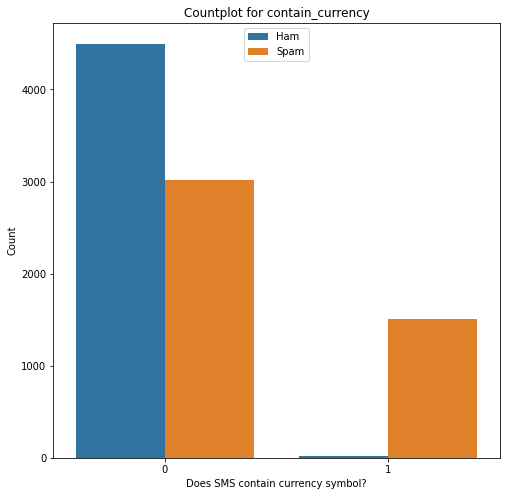

In [22]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
sns.countplot(x='contains_currency_symbol', data=df, hue='label')
plt.title('Countplot for contain_currency')
plt.xlabel('Does SMS contain currency symbol?')
plt.ylabel('Count')
plt.legend(labels=['Ham', 'Spam'], loc=9)
plt.show()

_**Insight: Almost 1/3 of Spam messages contain currency symbols**, and currency symbols are **rarely used in Ham messages.**_

In [23]:
# Creating feature 'contains_number'
def numbers(x):
    for i in x:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

df['contains_number'] = df['message'].apply(numbers)

In [24]:
df

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
4036,1,YOU ARE CHOSEN TO RECEIVE A £350 AWARD! Pls ca...,28,1,1
1221,1,No. 1 Nokia Tone 4 ur mob every week! Just txt...,31,0,1
1328,1,Ur balance is now £500. Ur next question is: W...,26,1,1
840,1,Last chance 2 claim ur £150 worth of discount ...,28,1,1


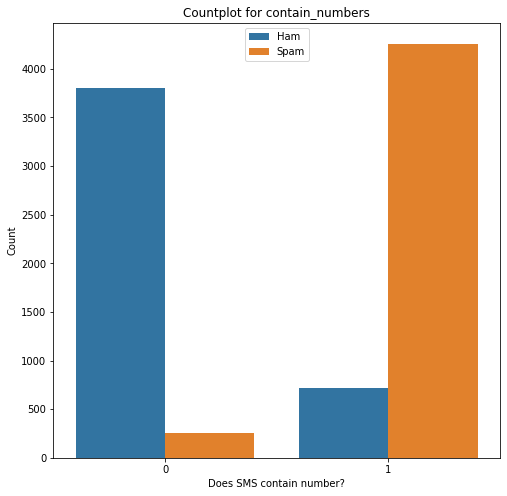

In [25]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
sns.countplot(x='contains_number', data=df, hue='label')
plt.title('Countplot for contain_numbers')
plt.xlabel('Does SMS contain number?')
plt.ylabel('Count')
plt.legend(labels=['Ham', 'Spam'], loc=9)
plt.show()

_**Insight:** It is evident that **most of the Spam messages contain numbers,** and **majority of the Ham messages donot contain numbers.**_

## Text Preprocessing
* Removing special character and numbers using regular expression
* Converting the entire sms into lower case
* Tokenizing the sms by words
* Removing the stop words
* Lemmatizing the words
* Joining the lemmatized words
* Building a corpus of messages

In [26]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [27]:
corpus[0:5]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though']

In [28]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

## Model Building & Evaluation
_**Metric: F1-Score**_

* Multiomail Naive Bayes
* Decision Tree
* **Random Forest (Ensemble)**
* Voting (Multinomial Naive Bayes + Decision Tree)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Fitting Naive Bayes to the Training set
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for MNB model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for MNB model: 0.932 ---
Standard Deviation: 0.012


--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       899
           1       0.94      0.96      0.95       908

    accuracy                           0.95      1807
   macro avg       0.95      0.95      0.95      1807
weighted avg       0.95      0.95      0.95      1807



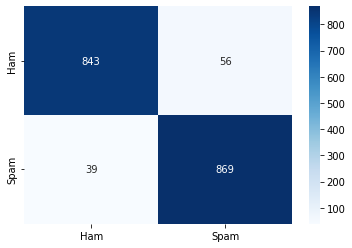

In [31]:
# Classification report for MNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('--- Classification report for MNB model ---')
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Ham', 'Spam']
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.show()

In [32]:
# Fitting Decision Tree to the Training set

dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Decision Tree model: 0.977 ---
Standard Deviation: 0.004


--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       899
           1       0.95      0.99      0.97       908

    accuracy                           0.97      1807
   macro avg       0.97      0.97      0.97      1807
weighted avg       0.97      0.97      0.97      1807



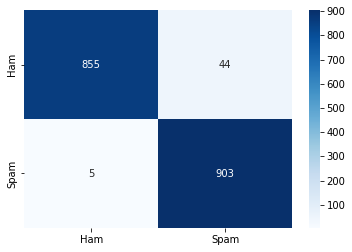

In [33]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Ham', 'Spam']
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.show()

In [34]:
# Fitting Random Forest to the Training set

rf = RandomForestClassifier(n_estimators=20)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Random Forest model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Random Forest model: 0.992 ---
Standard Deviation: 0.002


--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       899
           1       0.99      1.00      0.99       908

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



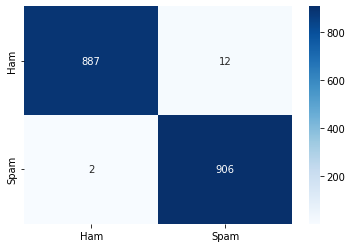

In [35]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Ham', 'Spam']
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.show()

### _**Note:** Decision Tree & MNB algorithms are selected and fed to Voting algorithm to increase the F1-Score!_

In [36]:
# Fitting Decision Tree and MNB to VotingClassifier

vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('--- Average F1-Score for VotingClassifier model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for VotingClassifier model: 0.977 ---
Standard Deviation: 0.003


### Note: Voting classifier did not out-perform Random Forest algorithm, hence **Random Forest algorithm** is selected for predicting the results of this problem statement.


## Making Predictions

In [37]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    final_message = [wnl.lemmatize(word) for word in sample_message_words]
    final_message = ' '.join(final_message)

    temp = tfidf.transform([final_message]).toarray()
    return rf.predict(temp)

In [38]:
# Prediction 1
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


In [39]:
# Prediction 2
sample_message = 'Hey Sam, How are you ?'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [40]:
# Prediction 3
sample_message = 'Get 1000$ by clicking on the link given below https://abcxyz.com'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')


Gotcha! This is a SPAM message.


In [41]:
# Prediction 4
sample_message = 'Satish, please give me 1000$'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [42]:
# Prediction 5
sample_message = 'Harsh, your google account is in danger, please protect using 2 way authentication'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

This is a HAM (normal) message.
